In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
import pytesseract as pt

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
image_dir="E:\Projects\Optical Character Recognition\Images\Images Project 2"

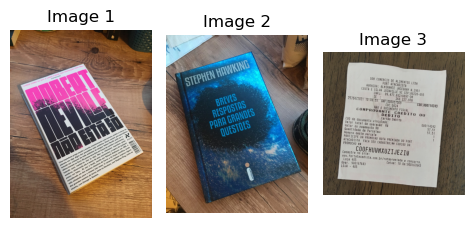

In [6]:
import os
c=1
for img in os.listdir(image_dir):
    path=os.path.join(image_dir,img)
    img=cv.imread(path)
    img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
    plt.subplot(1,4,c)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Image {c}')
    c+=1
plt.tight_layout()
plt.show()

In [7]:
img=cv.imread(r"E:\Projects\Optical Character Recognition\Images\Images Project 2\doc_rotated01.jpg")

In [8]:
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)

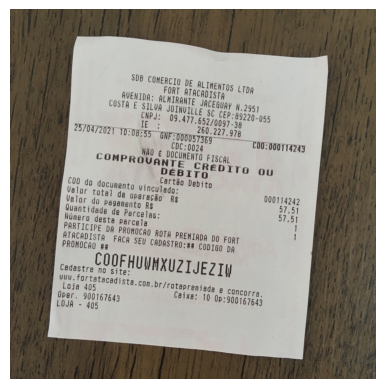

In [11]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [12]:
img.shape

(1061, 1049, 3)

In [15]:
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)

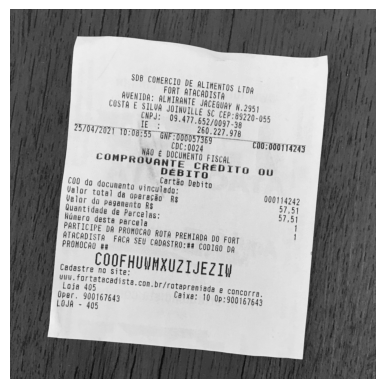

In [18]:
plt.imshow(gray,cmap='gray')
plt.axis('off')
plt.show()

Gaussian Blur

In [20]:
blur=cv.GaussianBlur(gray,(5,5),0)

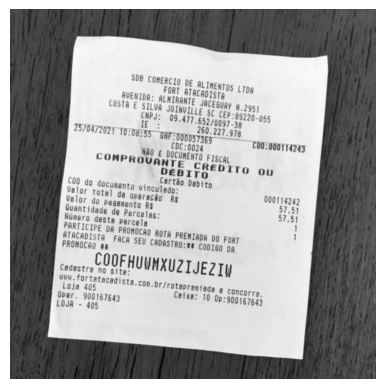

In [21]:
plt.imshow(blur,cmap='gray')
plt.axis('off')
plt.show()

Edge Detection

In [22]:
edge=cv.Canny(blur,60,160)

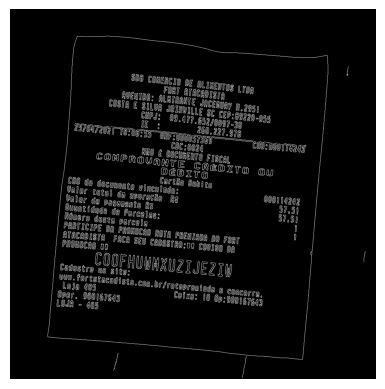

In [24]:
plt.imshow(edge,cmap='gray')
plt.axis('off')
plt.show()

Contour Detection

In [25]:
import imutils
cont=cv.findContours(edge,cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)
cont=imutils.grab_contours(cont)
cont=sorted(cont,key=cv.contourArea,reverse=True)[:6]

In [26]:
cont

[array([[[275,  77]],
 
        [[274,  78]],
 
        [[238,  78]],
 
        ...,
 
        [[300,  78]],
 
        [[285,  78]],
 
        [[284,  77]]], dtype=int32),
 array([[[274,  78]],
 
        [[275,  77]],
 
        [[284,  77]],
 
        ...,
 
        [[236,  78]],
 
        [[237,  79]],
 
        [[238,  78]]], dtype=int32),
 array([[[298, 702]],
 
        [[296, 704]],
 
        [[295, 704]],
 
        [[294, 705]],
 
        [[294, 707]],
 
        [[293, 708]],
 
        [[293, 719]],
 
        [[292, 720]],
 
        [[292, 729]],
 
        [[291, 730]],
 
        [[291, 731]],
 
        [[292, 732]],
 
        [[292, 734]],
 
        [[296, 738]],
 
        [[301, 738]],
 
        [[302, 737]],
 
        [[304, 737]],
 
        [[307, 734]],
 
        [[307, 731]],
 
        [[308, 730]],
 
        [[308, 722]],
 
        [[309, 721]],
 
        [[309, 710]],
 
        [[310, 709]],
 
        [[309, 708]],
 
        [[309, 706]],
 
        [[305, 702]]], dtype=int

Largest Contour

In [28]:
from re import A
for c in cont:
    p=cv.arcLength(c,True)
    approx=cv.approxPolyDP(c,0.02*p,True)
    if len(approx)==4:
        larger=approx
        break

In [33]:
ct=cv.drawContours(img,larger,-1,(120,120,120),28)
ct=cv.drawContours(ct,[larger],-1,(120,255,0),2)

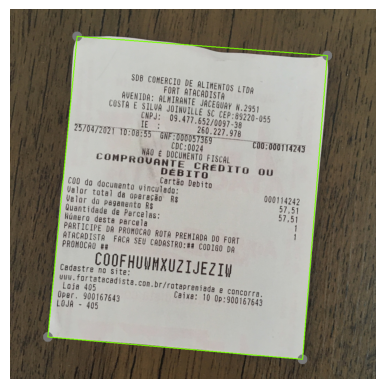

In [35]:
plt.imshow(ct)
plt.axis('off')
plt.show()

In [41]:
larger

array([[[ 192,   78]],

       [[ 108,  940]],

       [[ 838, 1004]],

       [[ 909,  133]]], dtype=int32)

In [50]:
top_left=larger[0][0]

In [51]:
top_right=larger[3][0]

In [57]:
bottom_right=larger[2][0]

In [58]:
bottom_left=larger[1][0]

In [59]:
coordinates=[top_left,top_right,bottom_right,bottom_left]

In [76]:
pts=np.array(coordinates,np.int32)

In [77]:
pts

array([[ 192,   78],
       [ 909,  133],
       [ 838, 1004],
       [ 108,  940]])

In [63]:
pts=pts.reshape((-1,1,2))

In [64]:
mask=np.zeros(img.shape[:2],dtype=np.uint8)

In [65]:
cv.fillPoly(mask,[pts],(255,255,255))

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [66]:
result=cv.bitwise_and(img,img,mask=mask)

In [67]:
x,y,w,h=cv.boundingRect(pts)

In [68]:
cropped_image=result[y:y+h,x:x+w]

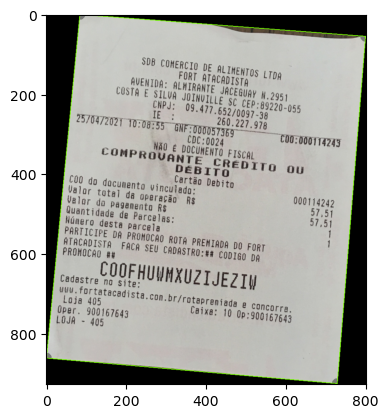

In [69]:
plt.imshow(cropped_image)

In [71]:
W=1049
H=1061
pts2=np.float32([[0,0],[W,0],[W,H],[0,H]])

In [79]:
pts

array([[ 192,   78],
       [ 909,  133],
       [ 838, 1004],
       [ 108,  940]])

In [80]:
pts2

array([[   0.,    0.],
       [1049.,    0.],
       [1049., 1061.],
       [   0., 1061.]], dtype=float32)

In [84]:
pts = np.array([[192, 78], [909, 133], [838, 1004], [108, 940]], dtype=np.float32)
pts2 = np.array([[0, 0], [1049, 0], [1049, 1061], [0, 1061]], dtype=np.float32)
matrix=cv.getPerspectiveTransform(pts,pts2)
warp_result = cv.warpPerspective(img, matrix, (1049, 1061))

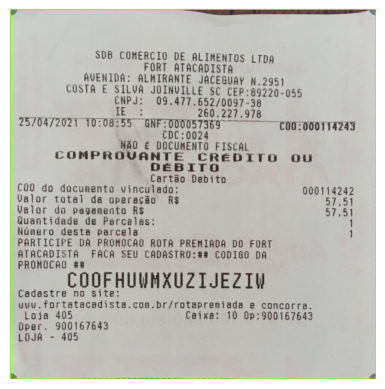

In [86]:
plt.imshow(warp_result)
plt.axis('off')
plt.show()

In [90]:
increase=cv.resize(warp_result,None,fx=1.5,fy=1.5,interpolation=cv.INTER_CUBIC)

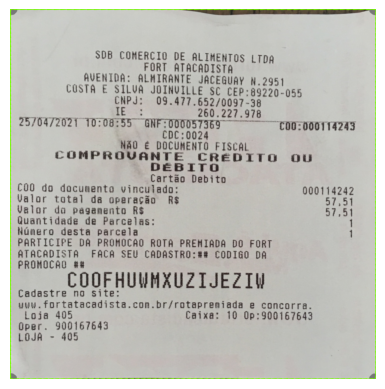

In [91]:
plt.imshow(increase)
plt.axis('off')
plt.show()

Increase Brightness and Contrast

In [94]:
brightness=50
contrast=80
brightened_image=np.where((255-warp_result)<brightness,255,warp_result+brightness)

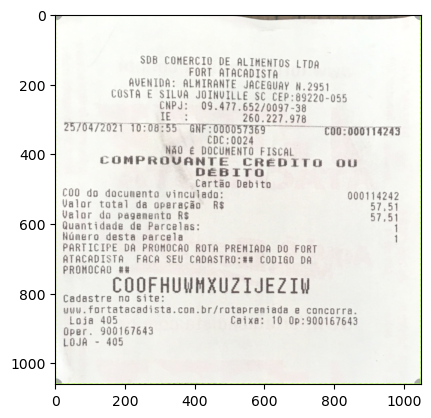

In [95]:
plt.imshow(brightened_image)

In [99]:
text=pt.image_to_string(brightened_image)

In [100]:
print(text)

SDB COMERCIO DE ALIMENTOS LTDA
FORT ATACADISTA
_ AVENIDA: ALMIRANTE JACEGUAY W.2951
COSTA E SILVA JOINUILLE SC CEP:85220-055
CNPJ: 09.477.652/0097-38
+ So: So 260. 227.978
2570472021 10:08:55~ A aes COO: 000TT4243
NAO € DOCUNENTO FISCAL
COMPROVANTE CREDITO ou

DEBIT

Cartaéo Debito
COO do documents vinculado: 000114242
Valor total da operacao R$ Bieol
Valor da pagamento R$ B75
Quantidade de Parcelas: 1
Ndmero desta parcela 1

PARTICIPE DA PROMOCAO ROTA PREMIADA DO FORT
ATACADISTA FACA SEU CADASTRO:## CODIGO DA
PROMOCAQ ##

COOFHUWHXUZTJEZIW

Cadastre no site:

uuu. fortatacadista.con.br/rotapremiada e concorra.
Loja 405 Caixa: 10 0p:900167643

Oper. 900167643

LOJA - 405


